In [56]:
from graph_loader import get_graph, save_graph, generate_graph
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Patch
import osmnx as ox
import networkx as nx
import sklearn
from scipy.spatial import distance
from shapely.geometry import Point

In [18]:
G_walk = get_graph("Wrocław, Poland", "wroclaw_walk.graphml")

Loading graph from graphs/wroclaw_walk.graphml


In [3]:
G = get_graph("Wrocław, Poland", "wroclaw.graphml")

Loading graph from graphs/wroclaw.graphml


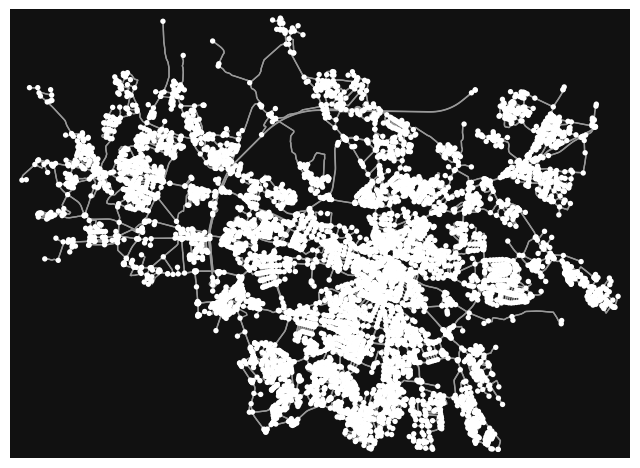

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
ox.plot_graph(G)

In [ ]:
ox.plot_graph(G, node_size=0)

# What is inside our graph?

In [5]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [20]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 7272
Number of edges: 17174


In [6]:
print("\nNodes and their attributes:")
for node, data in list(G.nodes(data=True))[:5]:
    print(node, data)


Nodes and their attributes:
95584835 {'y': 51.0831108, 'x': 17.0495131, 'street_count': 4}
95584841 {'y': 51.0846994, 'x': 17.0643667, 'street_count': 3}
95584850 {'y': 51.0833278, 'x': 17.0350567, 'street_count': 4}
95584852 {'y': 51.0830089, 'x': 17.0535725, 'street_count': 4}
95584855 {'y': 51.0833328, 'x': 17.0346847, 'street_count': 4}


In [7]:
# Print the first few edge attributes
print("\nEdges and their attributes:")
for u, v, key, data in list(G.edges(data=True, keys=True))[:5]:
    print(u, v, data)


Edges and their attributes:
95584835 241778108 {'osmid': [656794402, 28458110], 'oneway': True, 'lanes': '2', 'ref': '94', 'name': 'aleja Armii Krajowej', 'highway': 'primary', 'maxspeed': '50', 'reversed': False, 'length': 30.729999999999997, 'geometry': <LINESTRING (17.05 51.083, 17.049 51.083, 17.049 51.083)>}
95584835 297779709 {'osmid': [656793686, 24707867, 1369010637, 1369010638], 'oneway': True, 'lanes': ['2', '3'], 'name': 'Bardzka', 'highway': 'tertiary', 'maxspeed': '50', 'reversed': False, 'length': 178.45, 'geometry': <LINESTRING (17.05 51.083, 17.049 51.083, 17.049 51.083, 17.049 51.083, 17.0...>}
95584841 164895026 {'osmid': 27665976, 'name': 'Biskupa Bernarda Bogedaina', 'highway': 'secondary', 'oneway': False, 'reversed': False, 'length': 14.714}
95584841 268480775 {'osmid': 304583916, 'oneway': True, 'lanes': '2', 'ref': '94', 'name': 'aleja Armii Krajowej', 'highway': 'primary', 'maxspeed': '50', 'reversed': False, 'length': 125.889, 'geometry': <LINESTRING (17.064 

## All edge atributes

In [8]:
def make_hashable(value):
    if isinstance(value, list):
        return tuple(value)
    elif isinstance(value, dict):
        return tuple(value.items())
    return value

edge_attribute_values = {}

for u, v, key, data in G.edges(data=True, keys=True):
    for attribute, value in data.items():
        hashable_value = make_hashable(value)
        
        if attribute not in edge_attribute_values:
            edge_attribute_values[attribute] = set()

        edge_attribute_values[attribute].add(hashable_value)

print("\nAll unique edge attribute keys and their possible values:")
for attribute, values in edge_attribute_values.items():
    print(f"\nAttribute: {attribute}")
    print(f"Possible values (showing up to 5):")
    sample_values = list(values)[:5]
    for value in sample_values:
        print(f"- {value}")


All unique edge attribute keys and their possible values:

Attribute: osmid
Possible values (showing up to 5):
- (128065658, 191640923)
- 188678167
- (1272711661, 633869130, 60342749)
- 304873520
- (1160759387, 28355439)

Attribute: oneway
Possible values (showing up to 5):
- False
- True

Attribute: lanes
Possible values (showing up to 5):
- ('5', '4')
- 7
- ('6', '7')
- ('4', '1')
- 4

Attribute: ref
Possible values (showing up to 5):
- 455
- A8
- S5
- S8
- 5

Attribute: name
Possible values (showing up to 5):
- Ząbkowicka
- Jelenia
- ('Bystrzycka', 'Stobrawska')
- Świątnicka
- Grabiszyńska

Attribute: highway
Possible values (showing up to 5):
- primary_link
- living_street
- tertiary_link
- motorway
- residential

Attribute: maxspeed
Possible values (showing up to 5):
- 10
- ('60', '40')
- 90
- 30
- ('70', '50')

Attribute: reversed
Possible values (showing up to 5):
- False
- True
- (False, True)

Attribute: length
Possible values (showing up to 5):
- 3.878
- 4.631
- 4.256
- 5.63

## All node atributes

In [9]:
def make_hashable(value):
    if isinstance(value, list):
        return tuple(value)
    elif isinstance(value, dict):
        return tuple(value.items())
    return value

nodes_attribute_values = {}

for x, data in G.nodes(data=True):
    for attribute, value in data.items():
        hashable_value = make_hashable(value)
        
        if attribute not in nodes_attribute_values:
            nodes_attribute_values[attribute] = set()

        nodes_attribute_values[attribute].add(hashable_value)

print("\nAll unique nodes attribute keys and their possible values:")
for attribute, values in nodes_attribute_values.items():
    print(f"\nAttribute: {attribute}")
    print(f"Possible values (showing up to 5):")
    sample_values = list(values)[:5]
    for value in sample_values:
        print(f"- {value}")


All unique nodes attribute keys and their possible values:

Attribute: y
Possible values (showing up to 5):
- 51.1169979
- 51.1269145
- 51.0942503
- 51.0909309
- 51.11154

Attribute: x
Possible values (showing up to 5):
- 17.026687
- 16.9724497
- 17.0332523
- 17.0194058
- 16.9918366

Attribute: street_count
Possible values (showing up to 5):
- 1
- 2
- 3
- 4
- 5

Attribute: highway
Possible values (showing up to 5):
- mini_roundabout
- traffic_signals
- crossing
- turning_circle
- give_way

Attribute: ref
Possible values (showing up to 5):
- 12701
- 58


## Changing visualisation colors

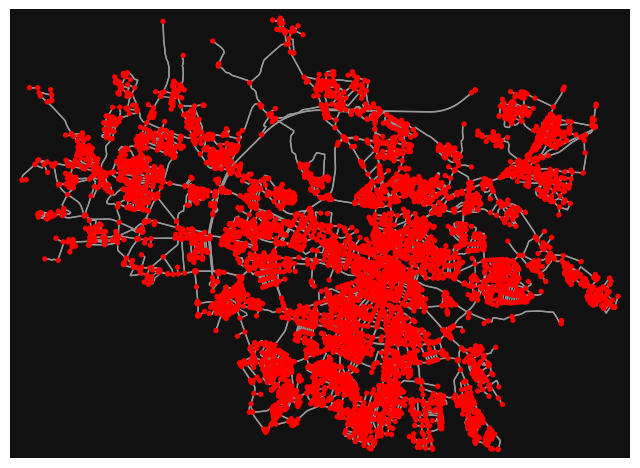

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
nodes_proj, edges_proj = ox.graph_to_gdfs(G, nodes=True, edges=True) 
ox.plot_graph(G,node_color='r')

## Viewing a fragment of the map

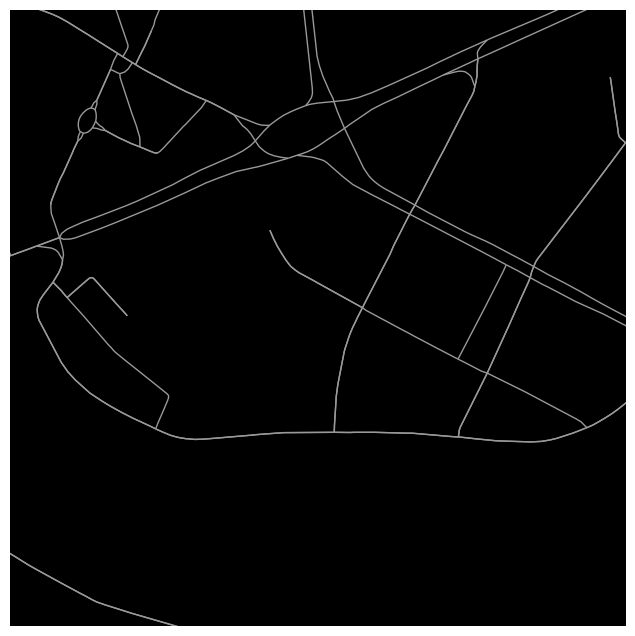

In [16]:
origin_point = (51.108817, 17.060677)
bbox = ox.utils_geo.bbox_from_point(point=origin_point, dist=500)

fig, ax = ox.plot_graph(G, bbox=bbox, node_size=0, bgcolor='k')

## Calculating and drawing paths

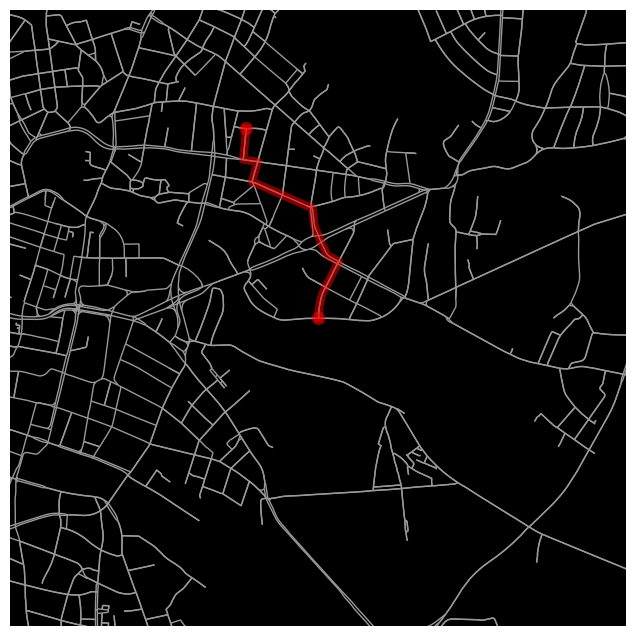

In [14]:
# Wyznaczmy ścieżkę pomiędzy Budynkiem A1 a E1 :)
origin_point = (51.107168, 17.061004)
destination_point = (51.118670, 17.055093)

origin_node = ox.distance.nearest_nodes(G, X=origin_point[1], Y=origin_point[0])  # X = longitude, Y = latitude
destination_node = ox.distance.nearest_nodes(G, X=destination_point[1], Y=destination_point[0])  # X = longitude, Y = latitude

route = ox.shortest_path(G, origin_node, destination_node)

bbox = ox.utils_geo.bbox_from_point(point=origin_point, dist=2000)

fig, ax = ox.plot_graph_route(G, route, bbox=bbox, route_linewidth=6, node_size=0, bgcolor='k')

In [49]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.2 MB)
Using cached scipy-1.15.2-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.3 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### Edges and their max speed

In [16]:
# Step 1: Count total number of edges
total_edges = G.number_of_edges()

In [26]:
# Step 2: Filter edges with maxspeed >= 50 (already done)
high_speed_edges = []
edges_with_limits = []
for edge in G.edges(data=True, keys=True):
    u, v, key, data = edge
    if 'maxspeed' in data:
        edges_with_limits.append(edge)

In [27]:
print(len(G.edges(data=True, keys=True)))

17174


In [28]:
print(len(edges_with_limits))

11666


In [33]:
first_edge = edges_with_limits[3]
print(first_edge[3]['maxspeed'])

50


In [36]:
edges_many_speeds = [edge for edge in edges_with_limits  if 'maxspeed' in edge[3] and type(edge[3]['maxspeed']) is not str]
print(len(edges_many_speeds))

439


# Walk Graph

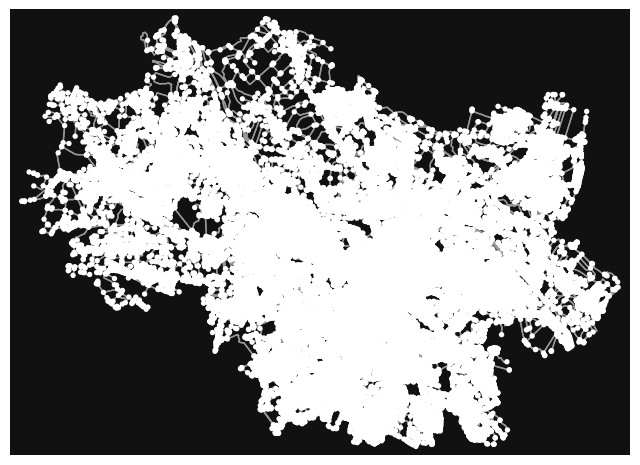

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [19]:
# THIS TAKES SOME TIME!
ox.plot_graph(G_walk)

In [21]:
print("Number of nodes:", G_walk.number_of_nodes())
print("Number of edges:", G_walk.number_of_edges())

Number of nodes: 123115
Number of edges: 351846


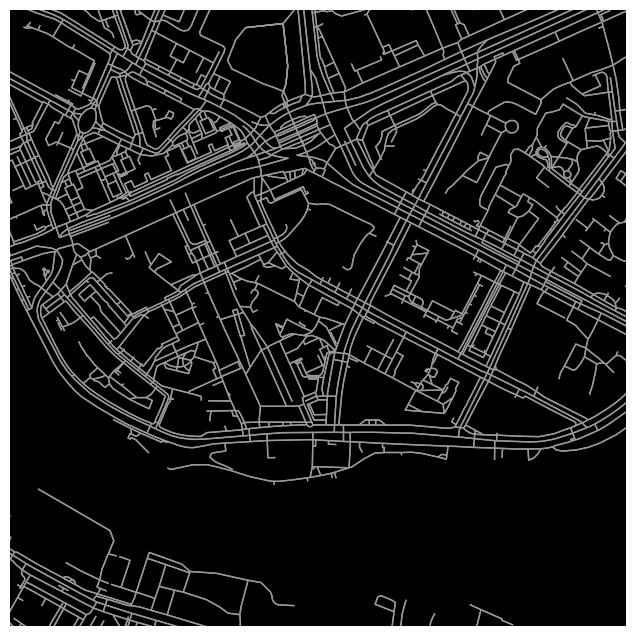

In [22]:
origin_point = (51.108817, 17.060677)
bbox = ox.utils_geo.bbox_from_point(point=origin_point, dist=500)

fig, ax = ox.plot_graph(G_walk, bbox=bbox, node_size=0, bgcolor='k')

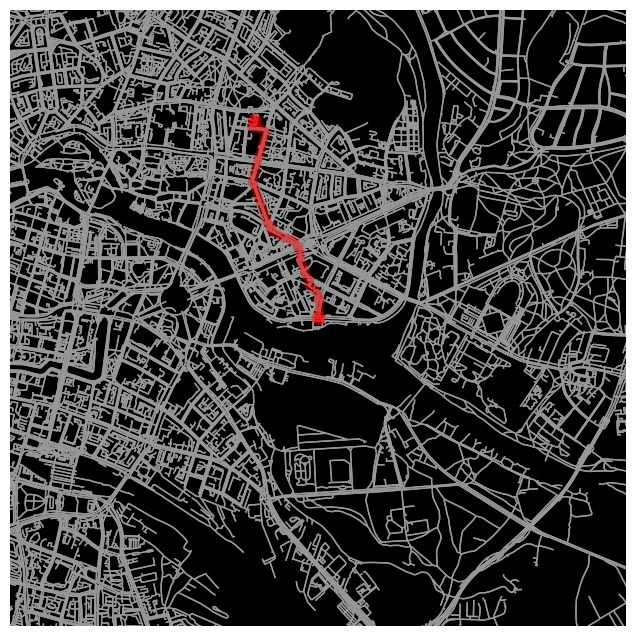

In [24]:
# Wyznaczmy ścieżkę pomiędzy Budynkiem A1 a E1 :)
origin_point = (51.107168, 17.061004)
destination_point = (51.118670, 17.055093)

origin_node = ox.distance.nearest_nodes(G_walk, X=origin_point[1], Y=origin_point[0])  # X = longitude, Y = latitude
destination_node = ox.distance.nearest_nodes(G_walk, X=destination_point[1], Y=destination_point[0])  # X = longitude, Y = latitude

route = ox.shortest_path(G_walk, origin_node, destination_node)

bbox = ox.utils_geo.bbox_from_point(point=origin_point, dist=2000)

fig, ax = ox.plot_graph_route(G_walk, route, bbox=bbox, route_linewidth=6, node_size=0, bgcolor='k')

# Reducing the size of graph

In [29]:
def find_central_node(G):
    x_coords = [data['x'] for node, data in G.nodes(data=True)]
    y_coords = [data['y'] for node, data in G.nodes(data=True)]
    
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    
    center_x = (x_min + x_max) / 2
    center_y = (y_min + y_max) / 2
    center_point = (center_x, center_y)
    
    central_node = min(
        G.nodes,
        key=lambda node: distance.euclidean(
            (G.nodes[node]['x'], G.nodes[node]['y']),
            center_point
        )
    )
    
    print("Central node ID:", central_node)
    print("Central node coordinates:", G.nodes[central_node])
    return central_node
central_node_walk = find_central_node(G_walk)

Central node ID: 1768844337
Central node coordinates: {'y': 51.1269913, 'x': 16.9920524, 'street_count': 3}


In [31]:
def show_place(G, point_coords, view_range=500):
    origin_point = point_coords
    bbox = ox.utils_geo.bbox_from_point(point=origin_point, dist=view_range)
    fig, ax = ox.plot_graph(G_walk, bbox=bbox, node_size=0, bgcolor='k')

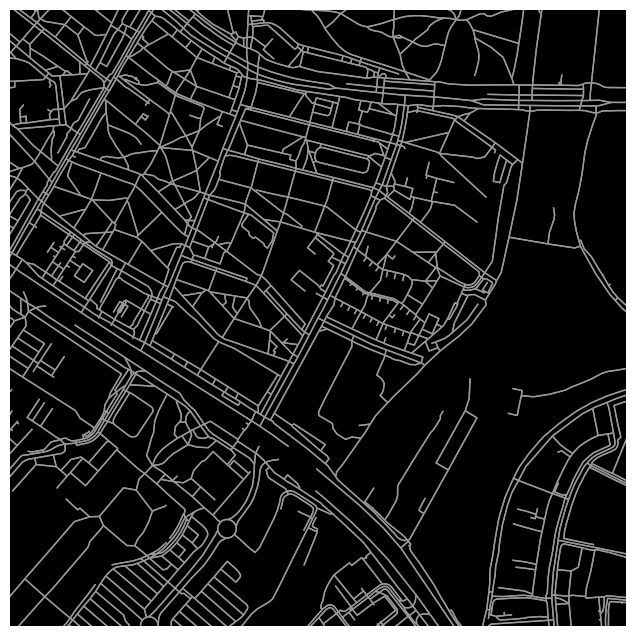

In [33]:
point_coords = (G_walk.nodes[central_node]['y'],G_walk.nodes[central_node]['x'])
show_place(G_walk, point_coords, 500)

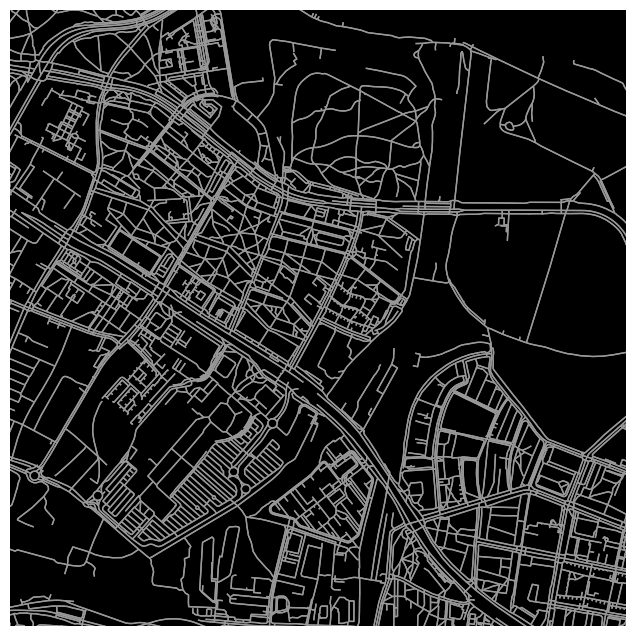

In [34]:
show_place(G_walk, point_coords, 1000)

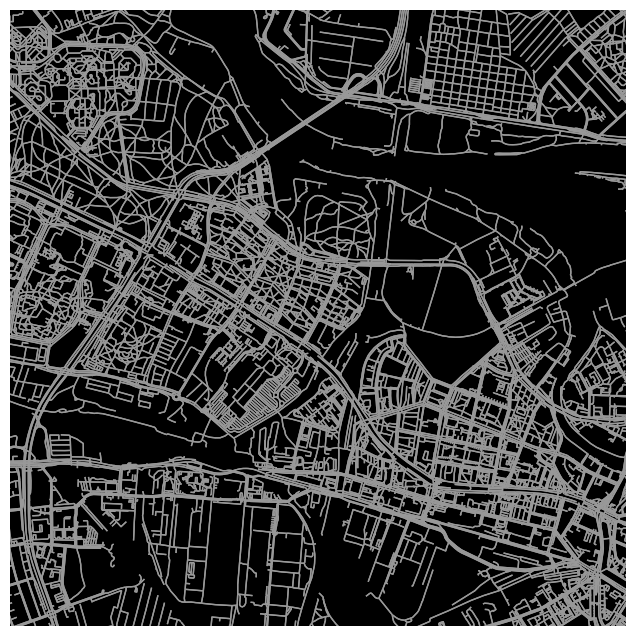

In [35]:
show_place(G_walk, point_coords, 2000)

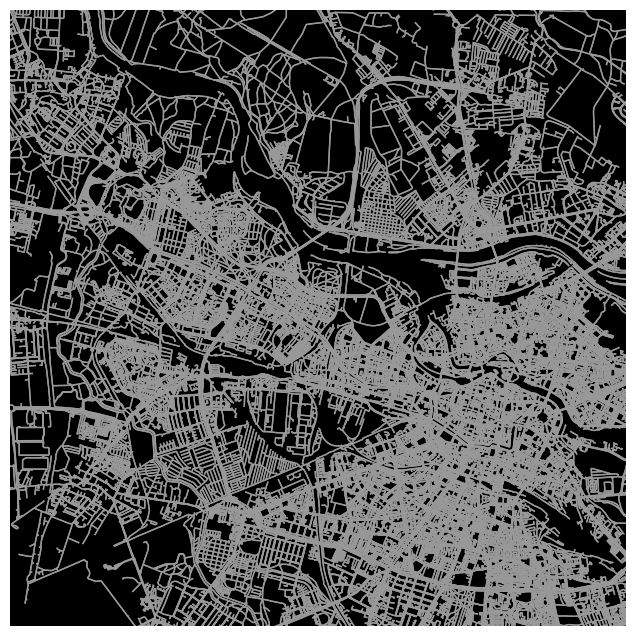

In [36]:
show_place(G_walk, point_coords, 5000)

## Alternative center - Town Square center 51.110554, 17.034863

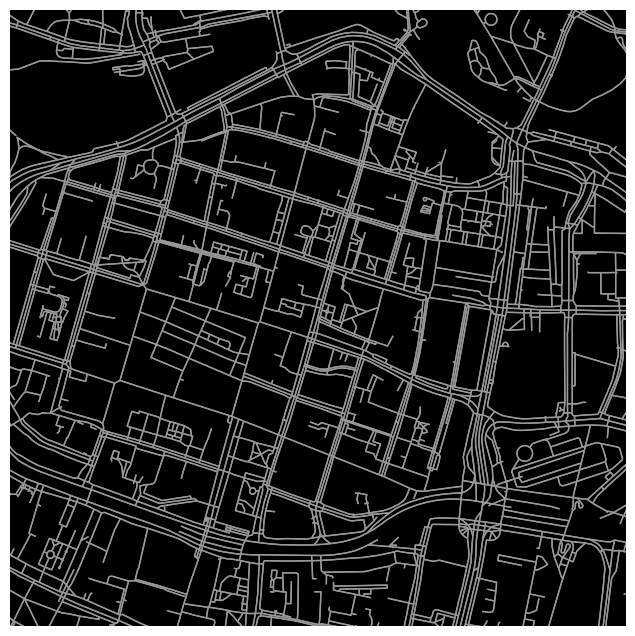

In [38]:
rynek_center_point = (51.110554, 17.034863)
show_place(G_walk, rynek_center_point, 500)

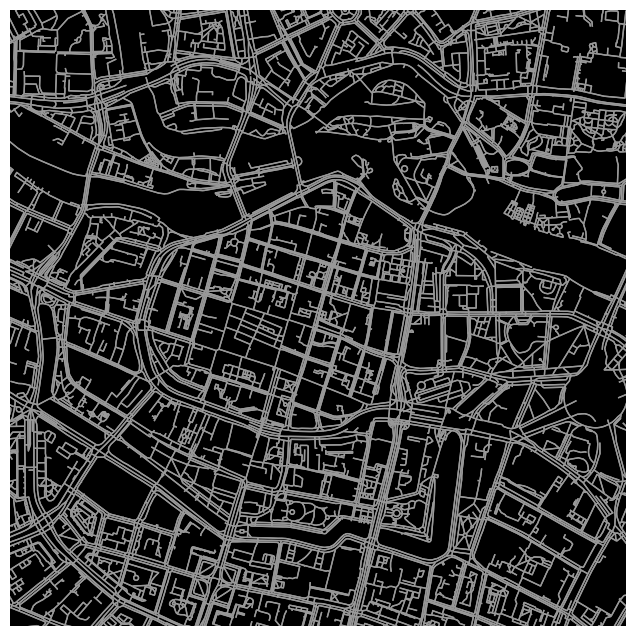

In [39]:
show_place(G_walk, rynek_center_point, 1000)

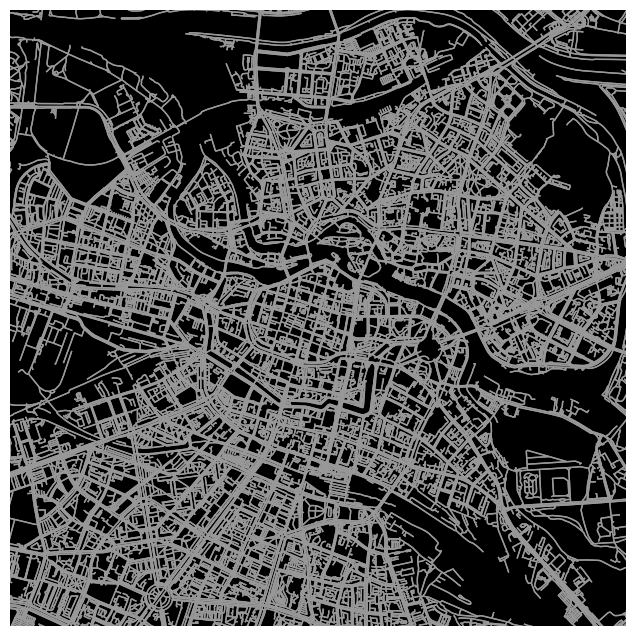

In [40]:
show_place(G_walk, rynek_center_point, 2500)

### Let's find out how much do we want to crop

In [51]:
rynek_center_point = (51.110554, 17.034863)  # (lat, lon)

rynek_node = ox.distance.nearest_nodes(G, X=rynek_center_point[1], Y=rynek_center_point[0])

rynek_node_proj = rynek_node
rynek_coords = (G_proj.nodes[rynek_node_proj]['x'], G_proj.nodes[rynek_node_proj]['y'])


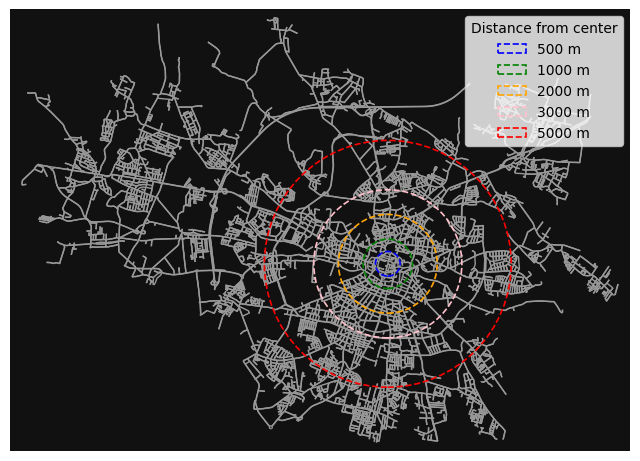

In [55]:
center_x = rynek_coords[0]
center_y = rynek_coords[1]

radius_list = [500, 1000, 2000, 3000, 5000]
colors = ['blue', 'green', 'orange','pink' ,'red']

fig, ax = ox.plot_graph(G_proj, node_size=0, show=False, close=False)

legend_handles = []
for radius, color in zip(radius_list, colors):
    circle = Circle((center_x, center_y), radius, color=color, fill=False, linestyle='--', linewidth=1.2)
    ax.add_patch(circle)
    legend_handles.append(Patch(edgecolor=color, facecolor='none', linestyle='--', label=f"{radius} m", linewidth=1.2))

ax.legend(handles=legend_handles, loc='upper right', title="Distance from center")

ax.set_aspect('equal')
plt.show()

Cutting down to 3000m seems reasonable for walking tasks - we do not want to walk to sub-urbs anyway

#### Data reduction with our cuts:


In [66]:
def trim_graph(G_proj, radius, alt_center_point=None):
    max_radius = radius

    if alt_center_point == None:
        center_x = rynek_coords[0]
        center_y = rynek_coords[1]
        center_point = Point(center_x, center_y)
    else:
        center_point = Point(alt_center_point[0], alt_center_point[1])
        
    total_nodes = len(G_proj.nodes)
    total_edges = len(G_proj.edges)
    print(f"Original: {total_nodes} nodes, {total_edges} edges")
    
    nodes_within_radius = []
    for node, data in G_proj.nodes(data=True):
        node_point = Point(data['x'], data['y'])
        if center_point.distance(node_point) <= max_radius:
            nodes_within_radius.append(node)
    
    G_trimmed = G_proj.subgraph(nodes_within_radius).copy()
    
    G_trimmed.remove_nodes_from(list(nx.isolates(G_trimmed)))
    
    trimmed_nodes = len(G_trimmed.nodes)
    trimmed_edges = len(G_trimmed.edges)
    
    nodes_pct = trimmed_nodes / total_nodes * 100
    edges_pct = trimmed_edges / total_edges * 100

    print(f"Radius: {max_radius}")
    print(f"After trim: {trimmed_nodes} nodes ({nodes_pct:.2f}%), {trimmed_edges} edges ({edges_pct:.2f}%)")
    print()
    return G_trimmed

In [61]:
G_walk_proj = ox.project_graph(G_walk)

In [67]:
for radius in radius_list:
    trim_graph(G_walk_proj, radius, alt_center_point=rynek_coords)

Original: 123115 nodes, 351846 edges
Radius: 500
After trim: 1846 nodes (1.50%), 5446 edges (1.55%)

Original: 123115 nodes, 351846 edges
Radius: 1000
After trim: 6208 nodes (5.04%), 18068 edges (5.14%)

Original: 123115 nodes, 351846 edges
Radius: 2000
After trim: 21748 nodes (17.66%), 63284 edges (17.99%)

Original: 123115 nodes, 351846 edges
Radius: 3000
After trim: 36379 nodes (29.55%), 105852 edges (30.08%)

Original: 123115 nodes, 351846 edges
Radius: 5000
After trim: 65363 nodes (53.09%), 189758 edges (53.93%)



In [68]:
G_walk_trimmed = trim_graph(G_walk_proj, 3_000, alt_center_point=rynek_coords)

Original: 123115 nodes, 351846 edges
Radius: 3000
After trim: 36379 nodes (29.55%), 105852 edges (30.08%)



In [70]:
# Save trimmed graph to file
save_graph(G_walk_trimmed,'trimmed_rynek_3000.graphml')

In [71]:
G_rynek_3000 = get_graph("Wrocław, Poland", "trimmed_rynek_3000.graphml")

Loading graph from graphs/trimmed_rynek_3000.graphml


#### Let's do our visualisation again to prove everything is valid

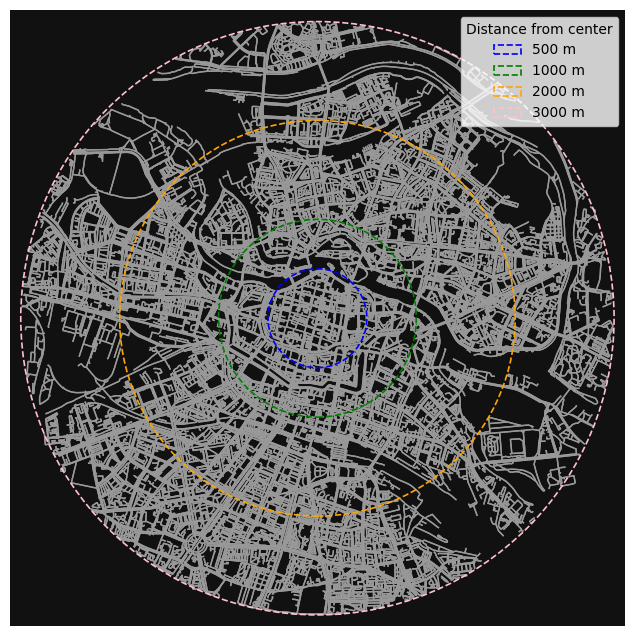

In [72]:
center_x = rynek_coords[0]
center_y = rynek_coords[1]

radius_list = [500, 1000, 2000, 3000]
colors = ['blue', 'green', 'orange','pink']

fig, ax = ox.plot_graph(G_rynek_3000, node_size=0, show=False, close=False)

legend_handles = []
for radius, color in zip(radius_list, colors):
    circle = Circle((center_x, center_y), radius, color=color, fill=False, linestyle='--', linewidth=1.2)
    ax.add_patch(circle)
    legend_handles.append(Patch(edgecolor=color, facecolor='none', linestyle='--', label=f"{radius} m", linewidth=1.2))

ax.legend(handles=legend_handles, loc='upper right', title="Distance from center")

ax.set_aspect('equal')
plt.show()

In [73]:
G_unproj = ox.project_graph(G_walk_trimmed, to_crs="epsg:4326")

m = ox.plot_graph_folium(G_unproj, popup_attribute='name', weight=2, color='blue')

m.save("trimmed_walk_graph_map.html")

/tmp/ipykernel_15180/3432698114.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn_r')  # green to red (reversed)


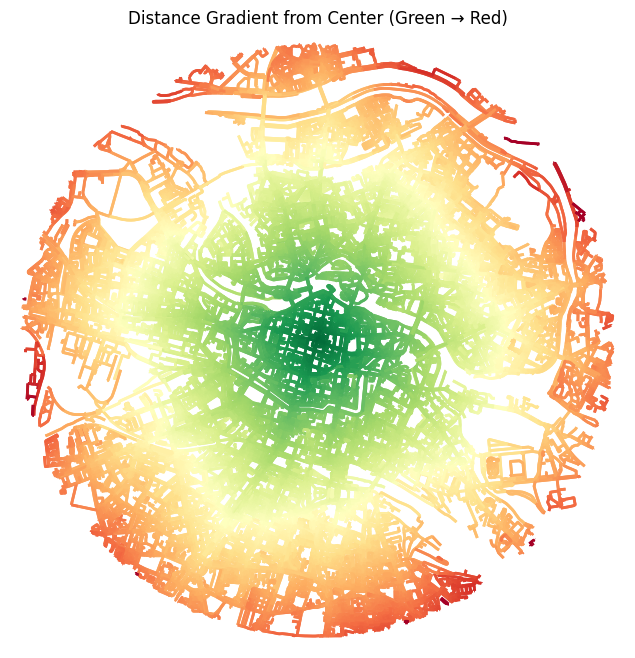

In [77]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

G_proj = ox.project_graph(G_unproj)
center_node = ox.distance.nearest_nodes(G_proj, X=rynek_coords[0], Y=rynek_coords[1])

lengths = nx.single_source_dijkstra_path_length(G_proj, center_node, weight='length')

max_dist = max(lengths.values())
norm = mcolors.Normalize(vmin=0, vmax=max_dist)
cmap = cm.get_cmap('RdYlGn_r')  # green to red (reversed)

edge_colors = []
for u, v, key in G_proj.edges(keys=True):
    dist_u = lengths.get(u, max_dist)
    dist_v = lengths.get(v, max_dist)
    avg_dist = (dist_u + dist_v) / 2
    color = cmap(norm(avg_dist))
    edge_colors.append(color)

fig, ax = ox.plot_graph(
    G_proj,
    node_size=0,
    edge_color=edge_colors,
    edge_linewidth=2,
    show=False,
    close=False,
    bgcolor="white"
)
plt.title("Distance Gradient from Center (Green → Red)")
plt.show()


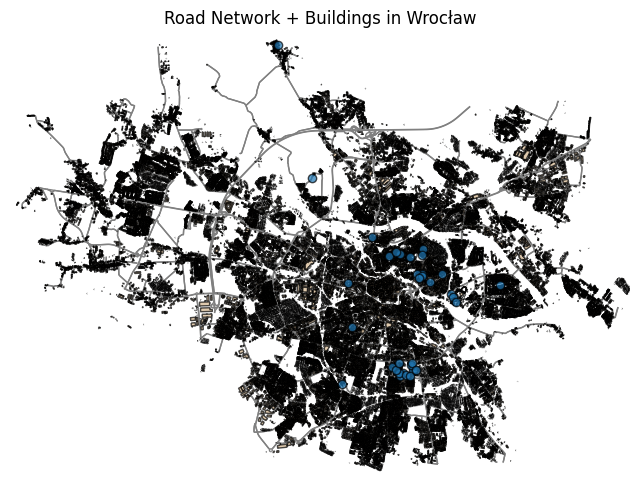

In [78]:
G = ox.graph_from_place("Wrocław, Poland", network_type='drive')
G_proj = ox.project_graph(G)

tags = {"building": True}
buildings = ox.geometries_from_place("Wrocław, Poland", tags=tags)
buildings_proj = ox.project_gdf(buildings)

fig, ax = ox.plot_graph(G_proj, show=False, close=False, node_size=0, edge_color='gray')

buildings_proj.plot(ax=ax, facecolor='tan', edgecolor='black', alpha=0.7)

plt.title("Road Network + Buildings in Wrocław")
plt.axis('off')
plt.show()

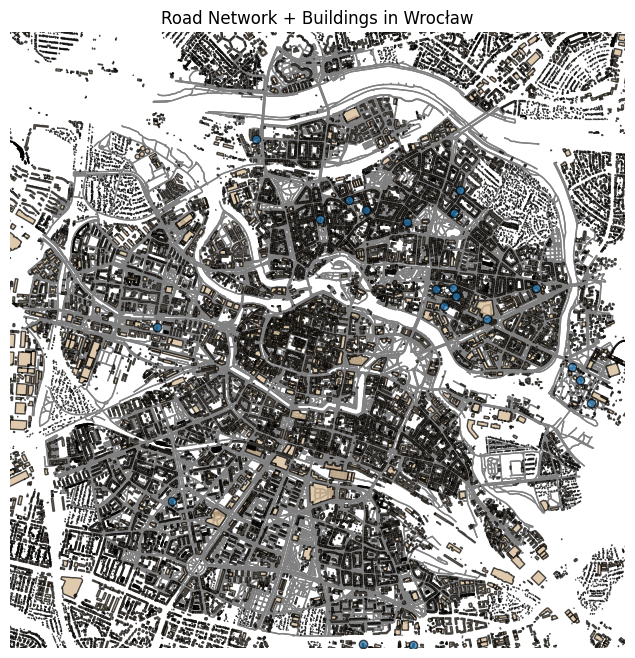

In [79]:
G_proj = ox.project_graph(G_unproj)
fig, ax = ox.plot_graph(G_proj, show=False, close=False, node_size=0, edge_color='gray')
buildings_proj.plot(ax=ax, facecolor='tan', edgecolor='black', alpha=0.7)

plt.title("Road Network + Buildings in Wrocław")
plt.axis('off')
plt.show()